In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ordpy

In [11]:
df = pd.read_csv('../data/covid19_incident_cases.csv',parse_dates=['date']).set_index('date')

In [58]:
locations = pd.read_csv('../data/location.csv').iloc[:52]
df = df[locations.location.values] ## only 51 states and US

<Axes: >

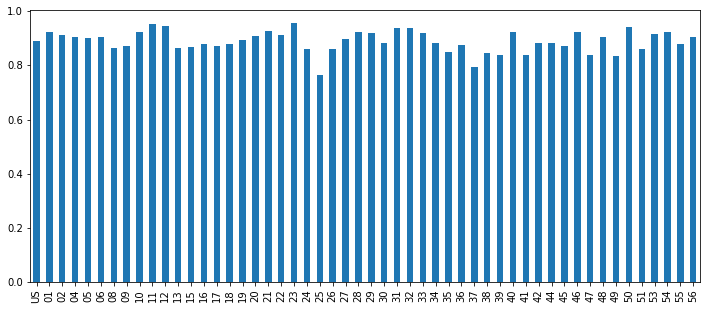

In [66]:
df.apply(lambda x: ordpy.permutation_entropy(x),axis=0).plot(kind='bar',figsize=(12,5))

<Axes: >

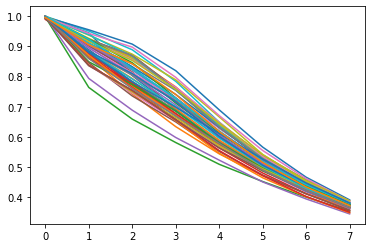

In [60]:
df.apply(lambda y: [ordpy.permutation_entropy(y.values,dx=x) for x in np.arange(2,10)]).plot(legend=None)

<Axes: xlabel='date'>

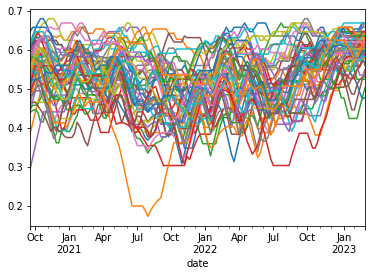

In [62]:
df.rolling(window=30).apply(lambda y: ordpy.permutation_entropy(y,dx=5)).dropna().plot(legend=False)

Text(0, 0.5, 'Predictability')

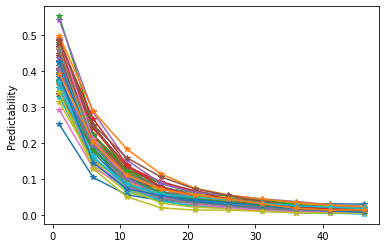

In [88]:
pe_df = pd.concat([df.rolling(window=z).apply(lambda y: ordpy.permutation_entropy(y,dx=2)).mean() for z in np.arange(5,55,5)],axis=1)
pe_df.columns = np.arange(1,50,5)

pe_df = pe_df.apply(lambda x: 1-x) ## predictability
pe_df.T.plot(legend=False,marker='*')
plt.ylabel('Predictability')